# Eksplorujemy modele `image-to-text`: `openai/gpt-4o` oraz  `openai/gpt-4o-mini`

## Czym jest model `openai/gpt-4o`?

* `openai/gpt-4o` to tzw. multimodalny model stworzony przez OpenAI.
* Może pracować zarówno z tekstem jak i obrazami jako danymi wejściowymi.
* W tej części zajmiemy się jego zdolnościami do pracy z obrazami. 
* Wejście: obraz
* Wyjście: tekst

## Czym jest model `openai/gpt-4o-mini`?

* `openai/gpt-4o-mini` to tańsza i szybsza wersja modelu `openai/gpt-4o`.
* Tak jak `openai/gpt-4o` może pracować zarówno z tekstem jak i obrazami jako danymi wejściowymi.
* Wejście: obraz
* Wyjście: tekst

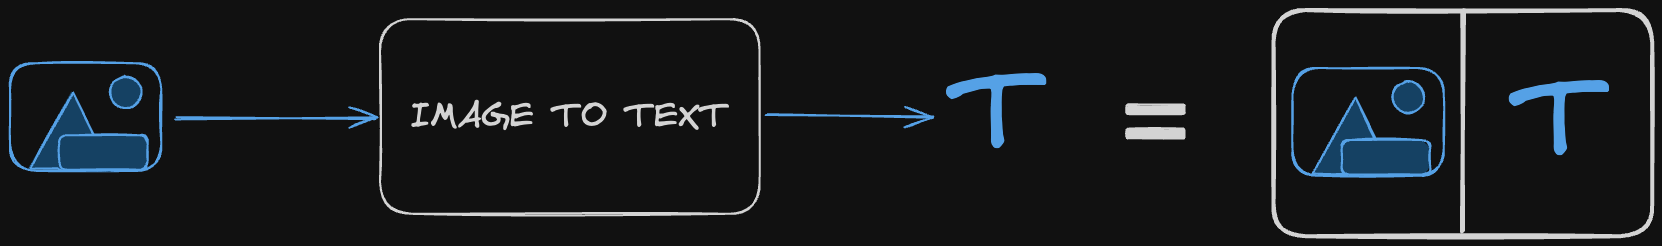

## Koszty

* Modele do interpretacji obrazów są płatne.
* Koszt zależy od rozdzielczości obrazu.
* Na stronie [Cennika OpenAI](https://openai.com/api/pricing/) można oszacować koszt pracy z obrazami.

Przykład wyceny dla wejściowego obrazu o rozdzielczości 1000x1000:

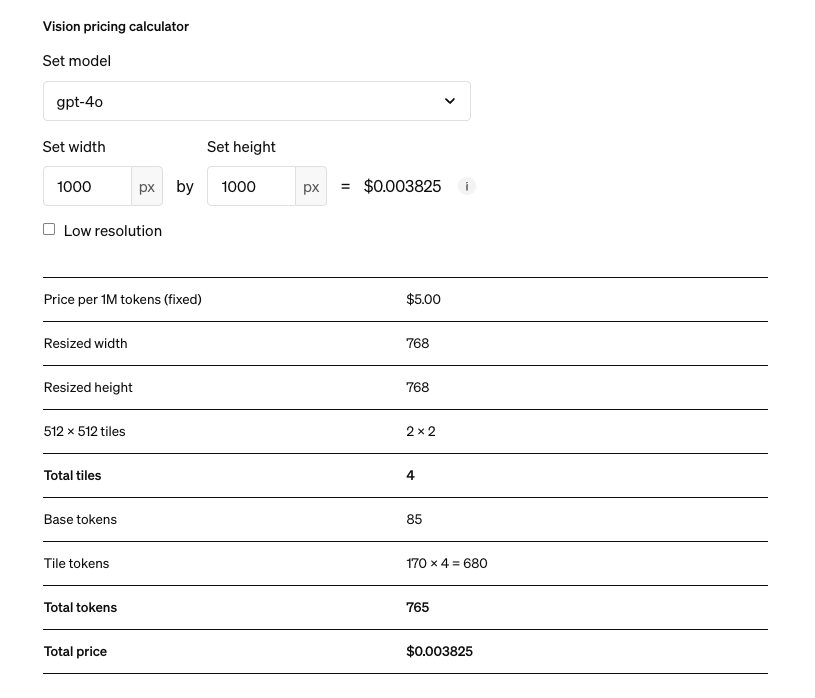

## Instalujemy wymagane biblioteki (conda wymagana)

- otwórz terminal
- uruchom `conda activate od_zera_do_ai`
- uruchom `conda install -y openai==1.47.0 python-dotenv`

In [ ]:
from dotenv import dotenv_values
from openai import OpenAI
from IPython.display import Markdown, Image
import base64

In [ ]:
env = dotenv_values(".env")

openai_client = OpenAI(api_key=env["OPENAI_API_KEY"])

In [ ]:
def prepare_image_for_open_ai(image_path):
    with open(image_path, "rb") as f:
        image_data = base64.b64encode(f.read()).decode('utf-8')

    return f"data:image/png;base64,{image_data}"

## Jak używać modelu `gpt-4o` do zapytań odnośnie obrazów?

In [ ]:
Image("dall_e_3__kot_siedzi_na_parapecie.png")

In [ ]:
response = openai_client.chat.completions.create(
    model="gpt-4o",
    temperature=0,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Stwórz opis obrazka, jakie widzisz tam elementy?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": prepare_image_for_open_ai("dall_e_3__kot_siedzi_na_parapecie.png"),
                        "detail": "high"
                    },
                },
            ],
        }
    ],
)

In [ ]:
Markdown(response.choices[0].message.content)

In [ ]:
# a jaki był koszt?
response.usage

## Jak wypada przez porównanie `gpt-4o-mini`?

In [ ]:
response = openai_client.chat.completions.create(
    model="gpt-4o-mini",
    temperature=0,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Stwórz opis obrazka, jakie widzisz tam elementy?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": prepare_image_for_open_ai("dall_e_3__kot_siedzi_na_parapecie.png"),
                        "detail": "high"
                    },
                },
            ],
        }
    ],
)

In [ ]:
Markdown(response.choices[0].message.content)

In [ ]:
# a jaki był koszt?
# okazuje się, że koszt gpt-4o i gpt-4o-mini jest taki sam gdy pracujemy z obrazkami!
response.usage

## Zamykamy model w funkcji

In [ ]:
def describe_image(image_path):
    response = openai_client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=0,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Stwórz opis obrazka, jakie widzisz tam elementy?"
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": prepare_image_for_open_ai(image_path),
                            "detail": "high"
                        },
                    },
                ],
            }
        ],
    )

    return response.choices[0].message.content

In [ ]:
Image("dall_e_3__kolorowanka_.png")

In [ ]:
describe_image("dall_e_3__kolorowanka_.png")

## Pomysły `gpt-4o` na użycie modelu

### 1. Automatyczne Generowanie Opisów do Zdjęć w Mediach Społecznościowych
Model AI może automatycznie tworzyć opisy do zdjęć publikowanych na platformach takich jak Instagram, Facebook czy Twitter. Może to ułatwić użytkownikom dodawanie treści do swoich postów oraz zwiększyć zaangażowanie dzięki lepszym opisom.

### 2. Wsparcie dla Osób Niewidomych i Słabowidzących
AI może przekształcać zdjęcia i obrazy na tekstowe opisy, które są następnie odczytywane na głos. Dzięki temu osoby niewidome lub słabowidzące mogą lepiej zrozumieć, co znajduje się na zdjęciu.

### 3. Automatyczne Tagowanie i Opisywanie Zdjęć w Bibliotekach Medialnych
Model AI może automatycznie generować tagi i opisy dla zdjęć przechowywanych w bibliotekach medialnych, takich jak Google Photos, ułatwiając organizację i wyszukiwanie obrazów na podstawie ich treści.

### 4. Generowanie Opisów Produktów w E-commerce
AI może analizować zdjęcia produktów i generować ich opisy, które następnie mogą być używane w sklepach internetowych. Automatyczne opisywanie produktów może przyspieszyć proces dodawania nowych towarów do oferty.

### 5. Tworzenie Opisów do Zeskanowanych Dokumentów i Zdjęć
Model AI może analizować zeskanowane dokumenty lub zdjęcia i generować dla nich opisy tekstowe. Dzięki temu można lepiej zorganizować i przeszukiwać archiwa zawierające obrazy dokumentów.

### 6. Generowanie Opisów dla Zdjęć w Aplikacjach Randkowych
W aplikacjach randkowych AI może automatycznie generować opisy na podstawie zdjęć użytkowników, pomagając im w stworzeniu atrakcyjnych i spójnych profili.

### 7. Opis Ilustracji w Książkach Elektronicznych
Model AI może generować opisy ilustracji w eBookach, ułatwiając ich przeglądanie i zapewniając dodatkowy kontekst dla czytelników. Może to być szczególnie przydatne w książkach edukacyjnych.

### 8. Automatyczne Generowanie Alt-tekstów dla Stron Internetowych
AI może automatycznie generować alt-teksty do obrazów na stronach internetowych, co poprawia dostępność stron dla osób korzystających z czytników ekranu i pozytywnie wpływa na SEO.

### 9. Katalogowanie Dzieł Sztuki w Muzeach i Galeriach
AI może być używany do opisywania dzieł sztuki na podstawie ich obrazów. Może to pomóc w tworzeniu katalogów wystaw, broszur informacyjnych lub wirtualnych przewodników po galeriach.

### 10. Opis Zawartości Kamer Monitoringu
AI może przekształcać nagrania z kamer monitoringu w opisy tekstowe, identyfikując osoby, przedmioty czy zdarzenia. Może to pomóc w szybszym przeszukiwaniu nagrań i identyfikowaniu istotnych momentów.